In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from k_means import K_Means

#### Question 4.1

With undirected gaphs with edge weights w, generally speaking, completely separated connected components will have eigenvalues of zero. If these connected components are not completely isolated, they will have non-zero, but small, eigenvalues. Given that, with this specific problem, the graph mirrors real-world conditions, I suspect that there are few, if any, completely isolated connected components. This means that there will be also few, if any, zero eigenvalues. Where k values enter the picture is choosing the number of clusters that are optimal for the dataset. In spectral clustering, the k lowest eigenvalues (and their respective eigenvectors) are chosen as the number of clusters/connected components. Getting the "perfect" k value where there are enough clusters to represent the data well, but not too many to be redundant, is key. Another way of thinking about it: the higher the k value, the more connected components a graph will have. Whether or not these connected components SHOULD ultimately be connected components at all is determined by the evaluation metric. 

In [2]:
nodes_path = r'D:\GT_Courses\Semester_3\ISYE-6740\Homework\HW1\Homwork1-data\data\nodes.txt'
edges_path = r'D:\GT_Courses\Semester_3\ISYE-6740\Homework\HW1\Homwork1-data\data\edges.txt'

In [3]:
def generateAdjacencyMatrix(ndf):
    
    return np.zeros((len(ndf['new_node_id']), len(ndf['new_node_id'])))

In [43]:
def populateAdjacencyMatrix(edf, matrix):
    
    for entry in edf['new_source_node'].unique(): 
        temp_df = edf[edf['new_source_node'] == entry]
        
        for entry2 in list(zip(temp_df['new_source_node'], temp_df['new_target_node'])):
            matrix[entry2[0]][entry2[1]] = matrix[entry2[0]][entry2[1]] + 1
            matrix[entry2[1]][entry2[0]] = matrix[entry2[1]][entry2[0]] + 1
            
    return matrix

In [44]:
def generateDegreeMatrix(ndf):
    
    return np.zeros((len(ndf['new_node_id']), len(ndf['new_node_id'])))

In [45]:
def populateDegreeMatrix(edf, deg_matrix, adj_matrix):
    
    for i in range(len(deg_matrix[0])):
        deg_matrix[i][i] = sum(adj_matrix[i])
            
    return deg_matrix

In [46]:
nodes_df = pd.read_csv(nodes_path, sep='\t', header=None)
edges_df = pd.read_csv(edges_path, sep='\t', header=None)

In [47]:
nodes_df = nodes_df.rename(columns={0: "node_id", 1: "website", 2:'orientation', 3:'directory'})

In [48]:
edges_df = edges_df.rename(columns={0: "source_node", 1: "target_node"})

In [49]:
unique_edge_sources = edges_df['source_node'].unique()
unique_edge_targets = edges_df['target_node'].unique()
unique_node_ids = nodes_df['node_id'].unique()

no_matches = []

for entry in unique_node_ids:
    if entry in unique_edge_sources:
        pass
    elif entry in unique_edge_targets:
        pass
    else:
        no_matches.append(entry)

In [50]:
drop_index = nodes_df.index[nodes_df['node_id'].isin(no_matches)].tolist()
nodes_df = nodes_df.drop(nodes_df.index[drop_index])
nodes_df = nodes_df.reset_index(drop=True)

In [51]:
nodes_df['new_node_id'] = nodes_df.index

In [52]:
new_node_key = dict(zip(nodes_df['node_id'], nodes_df['new_node_id']))

In [53]:
edges_df['new_source_node'] = edges_df['source_node'].apply(lambda x: new_node_key[x])
edges_df['new_target_node'] = edges_df['target_node'].apply(lambda x: new_node_key[x])

In [54]:
nodes_df

,node_id,website,orientation,directory,new_node_id
0,1,100monkeystyping.com,0,Blogarama,0
1,2,12thharmonic.com/wordpress,0,BlogCatalog,1
2,5,750volts.blogspot.com,0,Blogarama,2
3,6,95theses.blogspot.com,0,Blogarama,3
4,7,abbadabbaduo.blogspot.com,0,"Blogarama,LeftyDirectory",4
...,...,...,...,...,...
1219,1486,youngconservative.blogspot.com,1,Blogarama,1219
1220,1487,zebrax.blogs.com,1,BlogCatalog,1220
1221,1488,zeke01.blogspot.com,1,"Blogarama,BlogCatalog",1221
1222,1489,zeke01.typepad.com,1,Blogarama,1222


In [55]:
edges_df

,source_node,target_node,new_source_node,new_target_node
0,267,1394,208,1138
1,267,483,208,376
2,267,1051,208,839
3,904,1479,718,1214
4,904,919,718,730
...,...,...,...,...
19085,1133,1390,909,1134
19086,1133,1429,909,1171
19087,1133,1423,909,1166
19088,1133,1408,909,1151


In [56]:
adjacency_matrix = generateAdjacencyMatrix(nodes_df)

In [57]:
adjacency_matrix = populateAdjacencyMatrix(edges_df, adjacency_matrix)

In [58]:
degree_matrix = generateDegreeMatrix(nodes_df)

In [59]:
degree_matrix = populateDegreeMatrix(edges_df, degree_matrix, adjacency_matrix)

In [60]:
laplacian_matrix = degree_matrix - adjacency_matrix

In [61]:
laplacian_matrix

array([[27., -1.,  0., ...,  0.,  0.,  0.],
       [-1., 48.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ..., -1., 22.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [62]:
eigen_values, eigen_vectors = np.linalg.eig(laplacian_matrix)

In [63]:
eigen_values = eigen_values.real
eigen_vectors = eigen_vectors.real

In [64]:
idx = eigen_values.argsort()[::-1]  
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

#### Question 4.2

All of the code above works to remove any unconnected nodes (and re-calculate their indexes/edges), calculate the Laplacian of the network, then find the eigenvalues and eigenvectors of the Laplacian. The code below is taking the k (2, 3, or 4) lowest eigenvalues, creating a new numpy 2D array of k joined eigenvectors, running K-means on this new array, then calculating the majority labels for each cluster.

In [26]:
cluster_orientation_list = []
cluster_idx_list_global = []

for k_val in range(2, 5):

    z_matrix = eigen_vectors[:, -k_val:]
    k_means = K_Means(k=k_val, threshold=0.0001, max_iter=50)
    k_means.loadData(z_matrix)
    
    k_means.train()
    
    trained_model = k_means.labeled_np_data
    trained_model = pd.DataFrame(trained_model)
    
    unique_clusters = trained_model[k_val].unique()
    
    cluster_idx_list = []
    cluster_orientation = []
    
    if len(unique_clusters) == 1:
        pass
    else:
        for entry in unique_clusters:

            cluster_idxs = trained_model[trained_model[k_val] == int(entry)].index.to_list()
            cluster_idx_list.append(cluster_idxs)

            cluster_orientation.append(np.argmax(np.bincount(nodes_df.iloc[cluster_idxs, :]['orientation'])))
            
        cluster_orientation_list.append(cluster_orientation)
        cluster_idx_list_global.append(cluster_idx_list)

In [27]:
for i in range(len(cluster_orientation_list)):
    print('-------------')
    print('For k = ' + str(len(cluster_orientation_list[i])))
    
    for j in range(len(cluster_orientation_list[i])):
        print('cluster_' + str(j) + ' has majority assignment ' + str(cluster_orientation_list[i][j]))

-------------
For k = 2
cluster_0 has majority assignment 1
cluster_1 has majority assignment 0
-------------
For k = 3
cluster_0 has majority assignment 1
cluster_1 has majority assignment 0
cluster_2 has majority assignment 1
-------------
For k = 4
cluster_0 has majority assignment 1
cluster_1 has majority assignment 0
cluster_2 has majority assignment 0
cluster_3 has majority assignment 1


#### Question 4.3

For each of the k clusters above in Q4.2, the mistmatch rate can be seen below.

In [28]:
mismatch_values_global = []

for i in range(len(cluster_orientation_list)):
    mismatch_count = 0
    mismatch_values = []
    
    for j in range(len(cluster_orientation_list[i])):

        cluster_n = len(nodes_df.iloc[cluster_idx_list_global[i][j], :]['orientation'])
        majority_count = nodes_df.iloc[cluster_idx_list_global[i][j], :]['orientation'][nodes_df.iloc[cluster_idx_list_global[i][j], :]['orientation'] == cluster_orientation_list[i][j]].size

        mismatch_rate = (cluster_n - majority_count) / cluster_n

        mismatch_count = mismatch_count + (cluster_n - majority_count)
        mismatch_values.append(mismatch_rate)
        
    mismatch_values_global.append(mismatch_values)

In [29]:
for i in range(len(mismatch_values_global)):
    print('-------------')
    print('For k = ' + str(len(mismatch_values_global[i])))
    
    for j in range(len(mismatch_values_global[i])):
        print('cluster_' + str(j) + ' has mismatch value ' + str(np.round(mismatch_values_global[i][j], 2)))

-------------
For k = 2
cluster_0 has mismatch value 0.48
cluster_1 has mismatch value 0.0
-------------
For k = 3
cluster_0 has mismatch value 0.45
cluster_1 has mismatch value 0.35
cluster_2 has mismatch value 0.33
-------------
For k = 4
cluster_0 has mismatch value 0.48
cluster_1 has mismatch value 0.09
cluster_2 has mismatch value 0.5
cluster_3 has mismatch value 0.0


#### Question 4.4

Naturally, the first few k values might not be the most optimal when trying to cluster such a large and relatively complicated graph. In order to optimize k values, mismatch rates must be minimized while keeping k values reasonably low (similar to the elbow method for K-means). Below is code that cycles through k values n times from 2 to 30, where n=30. Essentially, all mismatch rates for k values between 2 and 30 are recorded in the mismatch_trial (30) x (30) array (the first two columns are dropped). This mismatch_array is averaged along the 0 axis getting the mean mismatch rate for each k value for the specified interval. By running through n=30 trials, the mismatch rate graph (seen below) is more consistent (sometimes individual trials will have sharp angles and unexpected dips where K-means clusters turn out empty; softened examples of this can be seen in the 0-10 k value range). As seen in k_values vs mismatch_values (n=30) below, the purple lines indicate the 'window' where mismatch rate falls quickly as k values increase slowly. The end of this dip is where the optimal k value will be found which, in this case, happens to be around 16 (previous runs show the same value +/- 2). Any k value past this will most likely be trivial, given that the mismatch rate does not also drop at the same rate that k values increase past this point. Any k value past this point would be equivalent to splitting a cluster of all one values just to have two clusters, though still having a low mismatch rate, that are relatively redundant (in respect to predicting 0 or 1, that is). 

One final note: the mismatch rate below is calculated by taking all of the "correct" assignment, summed accross all clusters, and dividing by the total number of datapoints.

In [30]:
mismatch_trial = np.zeros((30, 30))

In [31]:
mismatch_values = []
k_values = []

for trial in range(30):
    for k_val in range(2, 30):

        z_matrix = eigen_vectors[:, -k_val:]
        k_means = K_Means(k=k_val, threshold=0.0001, max_iter=50)
        k_means.loadData(z_matrix)

        k_means.train()

        trained_model = k_means.labeled_np_data
        trained_model = pd.DataFrame(trained_model)

        unique_clusters = trained_model[k_val].unique()

        cluster_idx_list = []
        cluster_orientation = []

        if len(unique_clusters) == 1:
            pass
        else:
            for entry in unique_clusters:

                cluster_idxs = trained_model[trained_model[k_val] == int(entry)].index.to_list()
                cluster_idx_list.append(cluster_idxs)

                cluster_orientation.append(np.argmax(np.bincount(nodes_df.iloc[cluster_idxs, :]['orientation'])))

            mismatch_count = 0

            for i in range(k_val):
                # print(cluster_idx_list[i])
                cluster_n = len(nodes_df.iloc[cluster_idx_list[i], :]['orientation'])
                majority_count = nodes_df.iloc[cluster_idx_list[i], :]['orientation'][nodes_df.iloc[cluster_idx_list[i], :]['orientation'] == cluster_orientation[i]].size

                mismatch_rate = (cluster_n - majority_count) / cluster_n

                mismatch_count = mismatch_count + (cluster_n - majority_count)

            mismatch_values.append(mismatch_count / k_means.shape[0])
            k_values.append(k_val)

            mismatch_trial[trial][k_val] = mismatch_count / k_means.shape[0]

C:\Users\SAAllegri\anaconda3\envs\ISYE-6740\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\SAAllegri\anaconda3\envs\ISYE-6740\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [32]:
k_val_ordered = np.arange(30)[2:]
mismatch_mean = np.average(mismatch_trial, axis=0)[2:]

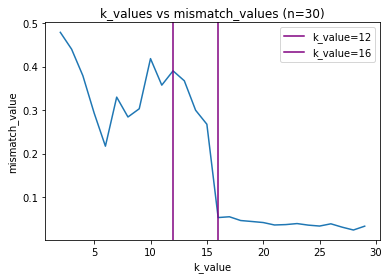

In [37]:
plt.plot(k_val_ordered, mismatch_mean)
plt.axvline(x=12, label='k_value=12', c='purple')
plt.axvline(x=16, label='k_value=16', c='purple')

plt.legend()

plt.xlabel("k_value")
plt.ylabel("mismatch_value")
plt.title('k_values vs mismatch_values (n=30)')

plt.show()

#### Question 4.5

What the above results show is that, generally, nodes that are highly connected tend to have similar political views. This can be seen in the k_values vs mismatch_values (n=30) graph above; as the k value increases, mismatch rate consistently lowers. As the k value increases, cluster partitioning becomes more meaningful and mismatch rate reaches close to zero (meaning that each cluster, nearly completely, shares political views). Clusters below show how, with this k=16 partitioning, these connected components have essentially only the same political views within themselves. In the grand scheme of things, this is simply showing that political blogs with similar views will be highly connected in the real world. 

In [34]:
nodes_df

,node_id,website,orientation,directory,new_node_id
0,1,100monkeystyping.com,0,Blogarama,0
1,2,12thharmonic.com/wordpress,0,BlogCatalog,1
2,5,750volts.blogspot.com,0,Blogarama,2
3,6,95theses.blogspot.com,0,Blogarama,3
4,7,abbadabbaduo.blogspot.com,0,"Blogarama,LeftyDirectory",4
...,...,...,...,...,...
1219,1486,youngconservative.blogspot.com,1,Blogarama,1219
1220,1487,zebrax.blogs.com,1,BlogCatalog,1220
1221,1488,zeke01.blogspot.com,1,"Blogarama,BlogCatalog",1221
1222,1489,zeke01.typepad.com,1,Blogarama,1222


In [40]:
cluster_orientation_list = []
cluster_idx_list_global = []

z_matrix = eigen_vectors[:, -k_val:]
k_means = K_Means(k=16, threshold=0.0001, max_iter=50)
k_means.loadData(z_matrix)

k_means.train()

trained_model = k_means.labeled_np_data
trained_model = pd.DataFrame(trained_model)

unique_clusters = trained_model[k_val].unique()

cluster_idx_list = []

for entry in unique_clusters:

    cluster_idxs = trained_model[trained_model[k_val] == int(entry)].index.to_list()
    cluster_idx_list.append(cluster_idxs)

In [41]:
for i, cluster in enumerate(cluster_idx_list):
    print('----------')
    print('Cluster ' + str(i))
    print('----------')
    display(nodes_df.iloc[cluster, :])

----------
Cluster 0
----------


,node_id,website,orientation,directory,new_node_id
0,1,100monkeystyping.com,0,Blogarama,0
1,2,12thharmonic.com/wordpress,0,BlogCatalog,1
2,5,750volts.blogspot.com,0,Blogarama,2
5,8,aboutpolitics.blogspot.com,0,"Blogarama,eTalkingHead",5
6,9,achingandspinning.blogspot.com,0,Blogarama,6
...,...,...,...,...,...
1217,1484,xanga.com/lockjawtheogre,1,Blogarama,1217
1218,1485,xtremerightwing.net,1,Blogarama,1218
1219,1486,youngconservative.blogspot.com,1,Blogarama,1219
1220,1487,zebrax.blogs.com,1,BlogCatalog,1220


----------
Cluster 1
----------


,node_id,website,orientation,directory,new_node_id
3,6,95theses.blogspot.com,0,Blogarama,3
40,44,anywhichway.net,0,Blogarama,40
50,59,b-patton.blogspot.com,0,Blogarama,50
90,106,bradcarson.com/blog,0,CampaignLine,90
107,129,charlineandjamie.com/dotnetweb01a/blogdisplay....,0,Blogarama,107
168,208,eltcamerica.blogspot.com,0,Blogarama,168
174,215,ergio.blogspot.com,0,eTalkingHead,174
264,338,kippsblog.com,0,Blogarama,264
312,400,massachusetts-liberal.com,0,Blogarama,312
378,487,openeyesmemo.com,0,"Blogarama,BlogCatalog",378


----------
Cluster 2
----------


,node_id,website,orientation,directory,new_node_id
4,7,abbadabbaduo.blogspot.com,0,"Blogarama,LeftyDirectory",4
22,26,americanmuslim.blogs.com,0,Blogarama,22
44,51,askhoudari.blogspot.com,0,Blogarama,44
45,52,astroturf.uni.cc,0,BlogCatalog,45
51,62,bakshi.us/redskunk,0,Blogarama,51
62,76,blog.dennisfox.net,0,eTalkingHead,62
69,83,blog01.kintera.com/emilysblog,0,CampaignLine,69
97,116,bushlies.net/pages/10/index.htm,0,CampaignLine,97
124,152,dailyblatt.blogspot.com,0,Blogarama,124
135,166,delraysteve.com/blog,0,Blogarama,135


----------
Cluster 3
----------


,node_id,website,orientation,directory,new_node_id
14,17,allanjenkins.typepad.com,0,BlogCatalog,14
41,45,arancaytar.blogspot.com,0,"BlogCatalog,eTalkingHead",41
106,128,charleypatton.blogspot.com,0,"BlogCatalog,eTalkingHead",106
513,659,theblueview.blogspot.com,0,"Blogarama,BlogCatalog",513


----------
Cluster 4
----------


,node_id,website,orientation,directory,new_node_id
26,30,amliberal.com/blog,0,"Blogarama,BlogCatalog,eTalkingHead",26
139,171,democratreport.blogspot.com,0,BlogCatalog,139
319,407,mcwil.blogspot.com,0,BlogCatalog,319
320,408,meanspirit.blogspot.com,0,BlogCatalog,320
574,738,winnegar.blog-city.com,0,BlogCatalog,574


----------
Cluster 5
----------


,node_id,website,orientation,directory,new_node_id
88,104,bowles2004.com/weblog,0,CampaignLine,88
310,397,markwarnerforpresident2008.blogspot.com,0,CampaignLine,310
361,462,njfordemocracy.org,0,BlogCatalog,361
406,516,politicswithrichard.blogspot.com,0,Blogarama,406
490,628,stitt.blogspot.com,0,CampaignLine,490
558,716,urbanecoinc.com/wordpress1,0,Blogarama,558
559,717,usademocrazy.blogspot.com,0,Blogarama,559


----------
Cluster 6
----------


,node_id,website,orientation,directory,new_node_id
141,173,democratvoice.org,0,Blogarama,141
173,213,enemykombatant.blogspot.com,0,BlogCatalog,173


----------
Cluster 7
----------


,node_id,website,orientation,directory,new_node_id
148,182,digital-democrat.blogspot.com,0,Blogarama,148
510,654,theantibush.org,0,Blogarama,510
518,666,thelonedem.com,0,Blogarama,518
539,690,tinylittledots.com,0,eTalkingHead,539


----------
Cluster 8
----------


,node_id,website,orientation,directory,new_node_id
149,184,digitaljay.blogspot.com,0,"LeftyDirectory,eTalkingHead",149
183,225,forewarned.blogspot.com,0,eTalkingHead,183
223,284,ilovecynics.com,0,Blogarama,223
370,474,nycitystoop.com,0,Blogarama,370
400,509,planetdave.com/blogs.php3?mid=1,0,BlogCatalog,400
705,890,charlesking.blogspot.com,1,eTalkingHead,705
724,912,conservativepolitics.blogspot.com,1,"Blogarama,eTalkingHead",724
863,1079,journals.aol.com/mark24609/myblog,1,eTalkingHead,863
1020,1259,quimundus.modblog.com,1,BlogCatalog,1020
1021,1260,quimundus.squarespace.com,1,"Blogarama,eTalkingHead",1021


----------
Cluster 9
----------


,node_id,website,orientation,directory,new_node_id
172,212,endthenightmare.blogspot.com,0,"Blogarama,eTalkingHead",172


----------
Cluster 10
----------


,node_id,website,orientation,directory,new_node_id
175,216,estropundit.blogspot.com,0,eTalkingHead,175
186,230,fuckthisblog.blogspot.com,0,Blogarama,186
254,325,julietterossant.com/superchefblog/superchefblo...,0,eTalkingHead,254
487,624,steveguy.me.uk,0,eTalkingHead,487
543,696,tomherod.blogspot.com,0,BlogCatalog,543
622,800,angrychineseblogger.blog-city.com,1,eTalkingHead,622
684,868,brianscott.blogspot.com,1,Blogarama,684
699,884,cecile.squarespace.com,1,Blogarama,699
722,910,conservativenation.us,1,Blogarama,722
930,1160,mostlycajun.com,1,BlogCatalog,930


----------
Cluster 11
----------


,node_id,website,orientation,directory,new_node_id
411,523,praguewriter.typepad.com,0,eTalkingHead,411


----------
Cluster 12
----------


,node_id,website,orientation,directory,new_node_id
606,780,allthingsmark.com,1,Blogarama,606
667,848,blog.so-amazing.net,1,Blogarama,667
789,987,franklog.com,1,Blogarama,789
813,1017,happyhomeschooler.blog-city.com,1,Blogarama,813
824,1030,hobsonschoice.us,1,Blogarama,824
927,1157,mindspring.com/~gsb3/blogger.html,1,Blogarama,927
946,1178,nationalnewsregister.com/modules/wordpress,1,"Blogarama,BlogCatalog",946
949,1182,neoconservatives.blogspot.com,1,Blogarama,949
1026,1265,raincrossblog.com,1,Blogarama,1026
1041,1281,renpro.kwcom.net,1,Blogarama,1041


----------
Cluster 13
----------


,node_id,website,orientation,directory,new_node_id
617,794,americanworldview.tripod.com/weltansblog,1,Blogarama,617
642,820,batr.net,1,Blogarama,642
643,821,batr.org/commentary.html,1,Blogarama,643
950,1183,neoconswatch.blogspot.com,1,Blogarama,950


----------
Cluster 14
----------


,node_id,website,orientation,directory,new_node_id
835,1046,imprescindibile.ilcannocchiale.it,1,BlogCatalog,835
960,1193,nicoladellarciprete.blogs.com,1,BlogCatalog,960


----------
Cluster 15
----------


,node_id,website,orientation,directory,new_node_id
1221,1488,zeke01.blogspot.com,1,"Blogarama,BlogCatalog",1221
